<a href="https://colab.research.google.com/github/forestschao/udl/blob/main/Notebooks/Chap07/e_7_17_sample_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch     0, loss 7.519
Epoch     1, loss 7.344
Epoch     2, loss 5.085
Epoch     3, loss 3.547
Epoch     4, loss 2.999
Epoch     5, loss 2.792
Epoch     6, loss 1.647
Epoch     7, loss 1.690
Epoch     8, loss 2.322
Epoch     9, loss 3.655
Epoch    10, loss 2.617
Epoch    11, loss 1.263
Epoch    12, loss 0.779
Epoch    13, loss 0.324
Epoch    14, loss 0.212
Epoch    15, loss 0.132
Epoch    16, loss 0.092
Epoch    17, loss 0.071
Epoch    18, loss 0.059
Epoch    19, loss 0.051
Epoch    20, loss 0.045
Epoch    21, loss 0.043
Epoch    22, loss 0.040
Epoch    23, loss 0.038
Epoch    24, loss 0.037
Epoch    25, loss 0.035
Epoch    26, loss 0.033
Epoch    27, loss 0.032
Epoch    28, loss 0.031
Epoch    29, loss 0.030
Epoch    30, loss 0.029
Epoch    31, loss 0.028
Epoch    32, loss 0.028
Epoch    33, loss 0.027
Epoch    34, loss 0.027
Epoch    35, loss 0.026
Epoch    36, loss 0.026
Epoch    37, loss 0.025
Epoch    38, loss 0.025
Epoch    39, loss 0.025
Epoch    40, loss 0.024
Epoch    41, los

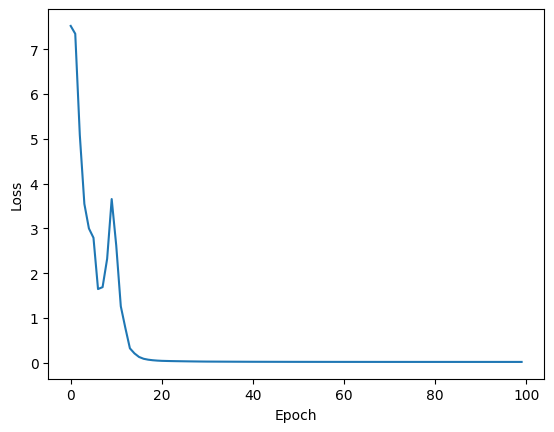

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import torch, torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
from torch.optim.lr_scheduler import StepLR

# define input size, hidden layer size, output size
D_i, D_k, D_o = 10, 40, 1
# create model with two hidden layers
model = nn.Sequential(
    nn.Linear(D_i, D_k),
    nn.ReLU(),
    nn.Linear(D_k, D_k),
    nn.ReLU(),
    nn.Linear(D_k, D_o),
    nn.Sigmoid(),
)

# He initialization of weights
def weights_init(layer_in):
  if isinstance(layer_in, nn.Linear):
    nn.init.kaiming_normal_(layer_in.weight)
    layer_in.bias.data.fill_(0.0)
model.apply(weights_init)

# choose least binary cross entropy loss function
criterion = nn.BCELoss()
# construct SGD optimizer and initialize learning rate and momentum
optimizer = torch.optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
# object that decrease learning rate by half every 10 epochs
scheduler = StepLR(optimizer, step_size=10, gamma=0.5)

# create 100 random data points and store in data loader class
x = torch.randn(100, D_i)
y = torch.randint(0, 2, (100, D_o)).float()
data_loader = DataLoader(TensorDataset(x, y), batch_size=10, shuffle=True)

# loop over the dataset 100 times
epoch_loss = np.zeros(100)
for epoch in range(100):
  # loop over batches
  for i, data in enumerate(data_loader):
    # retrieve inputs and labels for this batch
    x_batch, y_batch = data
    # zero the parameter gradients
    optimizer.zero_grad()
    # forward pass
    pred = model(x_batch)
    loss = criterion(pred, y_batch)
    # backward pass
    loss.backward()
    # SGD update
    optimizer.step()
    epoch_loss[epoch] += loss.item()

  # print error
  print(f'Epoch {epoch:5d}, loss {epoch_loss[epoch]:.3f}')
  # tell scheduler to consider updating learning rate
  scheduler.step()

fig, ax = plt.subplots()
ax.plot(np.arange(100), epoch_loss)
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
plt.show()
